# **Neural Networks in Astrophysics**
In this module we will be going through a real life example of using neural networks and machine learning techniques to classify exoplanet existence.


# **Background Science and Dataset Exploration**

## Determining Existence of Exoplanets

We are using a Kaggle dataset that contains light intensity measurements from a distant star system. The dataset is accessible via the Kaggle API, allowing us to directly download it into our Colab notebooks. It comes as a CSV file, where each row records a timestamp and the corresponding measured light intensity (flux) from the star.



Light Intensity (Flux):
The brightness of a star is measured using light intensity, often called flux. This is the amount of light energy received per unit area per unit time, typically measured in units like watts per square meter (W/m²). We will be using flux values to track how much observed brightness from a distant start changes over time.

Exoplanet:
An exoplanet is a planet located outside our solar system, orbiting a star other than our Sun. Exoplanets can vary widely in size, composition, and orbital distance.

Transit Photometry:
Transit photometry is a technique used to detect exoplanets by monitoring the light curve (brightness over time) of a star. The intuition behind the method is, a planet orbits a star may periodically pass (transit) in front of it blocking a small fraction of the star's light from our photometers (instrument to measure light flux) attached to a telescope. This creates a periodic dip in the light intensity recordings. By analyzing these dips, we can determine the presence of an exoplanet.


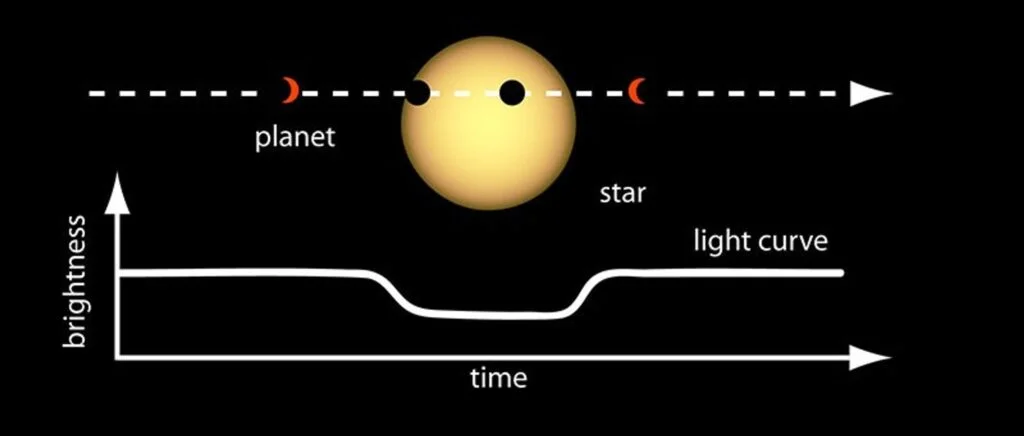

The x-axis is time and y-axis is light flux (brightness). The dip indicates that there exists an object that obstructs the light emitted by a star to our telescope. The duration and periodicity of the dip is what we will use to distinguish between random noise, or a comet flying by and an exoplanet existing.  

## Grabbing Dataset

In [ ]:
#Gets dataset from Kaggle a website that houses datasets for a bunch of ML projects
#Run this twice
import kagglehub

# Download latest version
path = kagglehub.dataset_download("keplersmachines/kepler-labelled-time-series-data")
path = kagglehub.dataset_download("keplersmachines/kepler-labelled-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/kepler-labelled-time-series-data


The path above is where the datasets are located at. You can check the location by clicking the folder with the two dots, and navigating over to the kaggle folder.

## Installing and Importing Dependencies

In [ ]:
%%capture
!pip install numpy pandas scikit-learn matplotlib torch

#installs dependencies for the following set

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Downloading and Visualizing Dataset

In [ ]:
PATH_TRAIN = "/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv"
PATH_TEST = "/kaggle/input/kepler-labelled-time-series-data/exoTest.csv"

In [ ]:
df_train = pd.read_csv(PATH_TRAIN)
df_test = pd.read_csv(PATH_TEST)

In [ ]:
df_all = pd.concat([df_train, df_test], ignore_index=True)

df_all["LABEL"] = df_all["LABEL"] - 1

 Each star has a binary label of 1 or 2.

 2 indicates that that the star is confirmed to have at least one exoplanet in orbit; 1 indicates that the star is confirmed not to have one exoplanet in orbit

## Step 1: Explore Data

I want you to plot 6 plots of the time series data with exoplanets in orbit.

In [ ]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),df_train[df_train['LABEL'] == 2].iloc[i,1:],s=2)

I want you to plot time series data of non-exoplanet time series data here

In [ ]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),df_train[df_train['LABEL'] == 1].iloc[i,1:],s=1)

## Print what the dataframe looks like

## Plot a Barplot of Exoplanets

## **Question**

After seeing the two graphs do you think you can tell the difference between these two graphs? If you can't do you think your machine can?

What would be good ways to augment/preprocess your data?

# Building Models

## Step 2: Setting a Baseline Model

### Simple Models First

As a cursory look into how well non-neural network models work. Go use a ML method besides neural networks to predict whether a exoplanet exists.

If you have trouble I would go back and look at LogisticRegression module for help on models and the Not Everything is Neural Networks module. You can use built-in functions, don't need to program the math.

### Pick Model that You think is suitable.

In [ ]:
#Import the correct model
from sklearn.linear_model import LogisticRegression

#Split df_all into X,y data

#Split X,y data into train test and also use random_state = 42


### Train/Fit Model

In [ ]:
#Define Model

#Fit Model


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

### Check on Test Data

### Evaluate Model

I want you to plot the Confusion Matrix out and calculate F1, Precision, Recall, and Accuracy.

In [ ]:
#Import accuracy_score precision score recall score f1 score and ConfusionMatrixDisplay from sklearn.metrics.
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, ConfusionMatrixDisplay



#Print Accuracy, Recall, Precision, F1
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")

#Print Confusion Matrix
#Put train_x, train_y, test_x, and test_y in teh respective spot
print("Training:")
ConfusionMatrixDisplay.from_estimator(model, , , cmap='Blues')
plt.show()
print("Testing:")
ConfusionMatrixDisplay.from_estimator(model, , , cmap='Blues')
plt.show()

Accuracy: 0.592756183745583
Recall: 0.6666666666666666
Precision: 0.01293103448275862
F1: 0.02536997885835095


What's wrong? What do you think you should do to improve the scores?
Do you think the decision boundary is linear?

What does recall mean here?
What does precision mean here?

## Step 3: Building a Neural Network

In [ ]:
import torch

### Convert Data into Tensors and Reshape Label Data

In [ ]:
x_train_tensor = torch.tensor(x_train.values, dtype = torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float32)

In [ ]:
y_train_tensor = y_train_tensor.reshape(4525, 1)
y_test_tensor = y_test_tensor.reshape(1132, 1)

#remember to reshape

### Import What You Need

In [ ]:
#Import needed modules from torch. I've already installed torch for you.
import torch.nn as nn

### Build the Architecture:

In [ ]:
#Class inherits from nn.Module
#Constructor needs to call super
#I would advise a larger nn than a smaller one in both number of neurons and layer
#Since its a binary classification ideally you should use what activation function in the end?


### Train/Fit Architecture

In [ ]:
#Use Adam Optimizer
#Define Loss and Optimizer


In [ ]:
#The number of epochs you do (i.e.) convergence conditions is up to you.

    #predictions from x_train data

    #Sets optimizer so it won't accumulate gradients

    #Calculate gradient descent

    #Update weights

    #Print loss:
    if epoch % 10 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

Epoch 0 Loss: 0.7168
Epoch 10 Loss: 0.0432
Epoch 20 Loss: 0.0563
Epoch 30 Loss: 0.0529
Epoch 40 Loss: 0.0469
Epoch 50 Loss: 0.0422
Epoch 60 Loss: 0.0398
Epoch 70 Loss: 0.0395
Epoch 80 Loss: 0.0392
Epoch 90 Loss: 0.0386
Epoch 100 Loss: 0.0375
Epoch 110 Loss: 0.0364
Epoch 120 Loss: 0.0343
Epoch 130 Loss: 0.0324
Epoch 140 Loss: 0.0320
Epoch 150 Loss: 0.0317
Epoch 160 Loss: 0.0317
Epoch 170 Loss: 0.0293
Epoch 180 Loss: 0.0308
Epoch 190 Loss: 0.0285
Epoch 200 Loss: 0.0266
Epoch 210 Loss: 0.0240
Epoch 220 Loss: 0.0223
Epoch 230 Loss: 0.0228
Epoch 240 Loss: 0.0219
Epoch 250 Loss: 0.0197
Epoch 260 Loss: 0.0176
Epoch 270 Loss: 0.0157
Epoch 280 Loss: 0.0137
Epoch 290 Loss: 0.0145
Epoch 300 Loss: 0.0125
Epoch 310 Loss: 0.0118
Epoch 320 Loss: 0.0103
Epoch 330 Loss: 0.0101
Epoch 340 Loss: 0.0155
Epoch 350 Loss: 0.0160
Epoch 360 Loss: 0.0146
Epoch 370 Loss: 0.0140
Epoch 380 Loss: 0.0134
Epoch 390 Loss: 0.0126
Epoch 400 Loss: 0.0130
Epoch 410 Loss: 0.0122
Epoch 420 Loss: 0.0112
Epoch 430 Loss: 0.0109

### Predict on Y_test

In [ ]:
#Predict the output from x_test


### Convert back to Numpy and Make Sure Sizes are Correct

In [ ]:
#Remember to detach and add it to the cpu


### Evaluate Model

In [ ]:
#REshape if necessary.


Accuracy: 0.9876325088339223
Recall: 0.0
Precision: 0.0
F1: 0.0


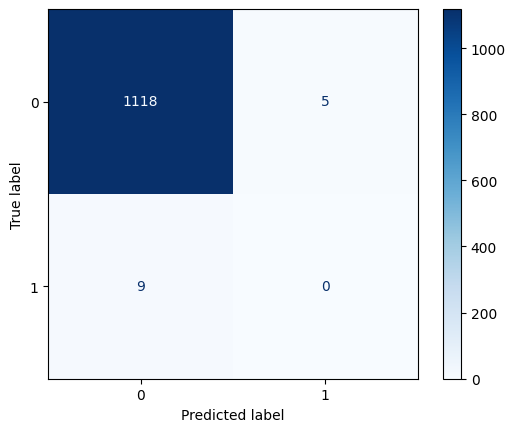

In [ ]:
#Do the same thing with the confusion matrix. Calculate accuracy, precisio, recall f1.

#Import accuracy_score precision score recall score f1 score and ConfusionMatrixDisplay from sklearn.metrics.

accuracy = accuracy_score()
recall = recall_score()
precision = precision_score()
f1 = f1_score()

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")

matrix = confusion_matrix(y_test_np, y_pred_np)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.show()

Do you think we can improve further by changing the model's parameters?
If not then skip step 4

If yes then do step 4

# Step 4: Make Improvements


This is the time where you have to experiment to improve the model evaluation.

Things you can try:

1. Changing Decisions Related to Neural Networks
    *   Change Activation Functions
    *   Change # of Layers
    *   Change # of Nodes per Hidden Layer
    *   Change Learning Rate
    *   Include Regularization Term


## Importance of Data Preprocessing

## **Let's now go back and preprocess our data.**

In [ ]:
from imblearn.over_sampling import SMOTE
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize

### Normalization

First Thing we will do is normalize our values. For simplicity so that the model doesn't blow up when computing activations, we standardize everything to [0,1]

Pick a normalization scaler. Up for you to decide what's best

In [ ]:
#Print the minmum value

np.float64(-2385019.12)

In [ ]:
#Print maximum flux value
X.values.max()

np.float64(4299288.0)

In [ ]:
#Pick a normalizatino method and use it
normalized_x = normalize(X)

Graph the Normalized Plots

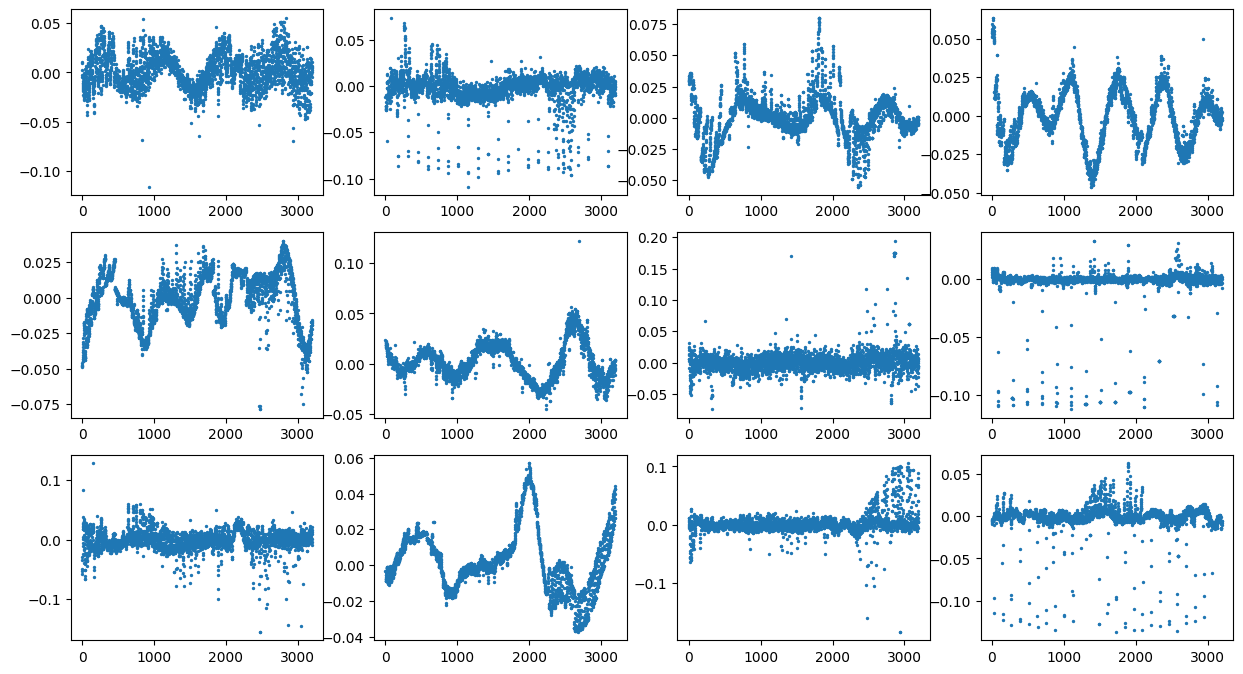

In [ ]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),normalized_x[i],s=2)

### Graph Original plots

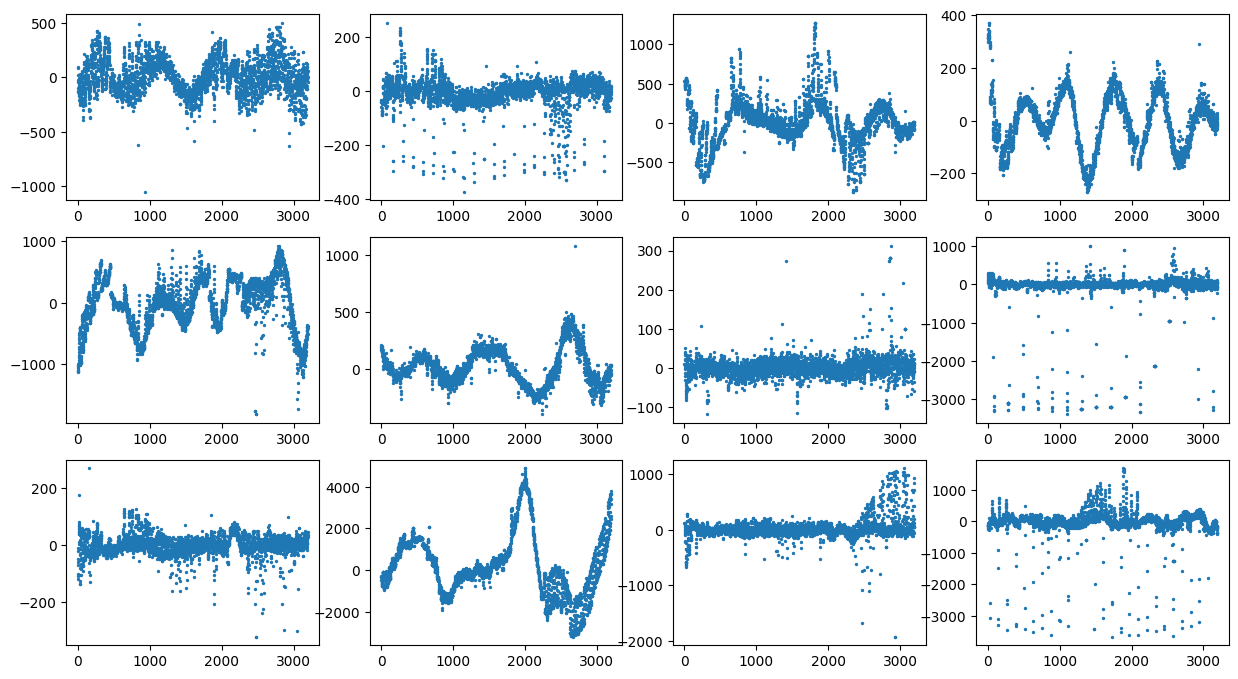

In [ ]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),X.values[i],s=2)

### DC Offset

Now we will perform a DC offset. DC Offset ensures that the flux data is centered.

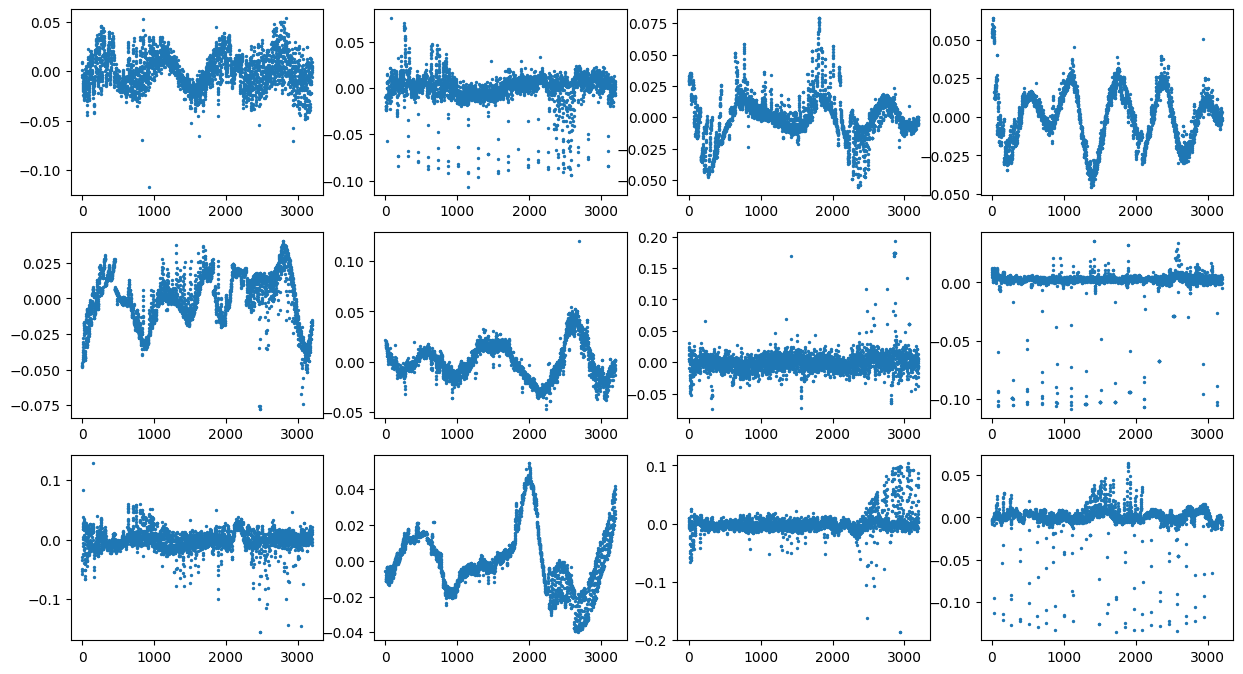

In [ ]:
x_dc_removed = normalized_x - np.mean(normalized_x, axis = 1, keepdims = True)

fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),x_dc_removed[i],s=2)

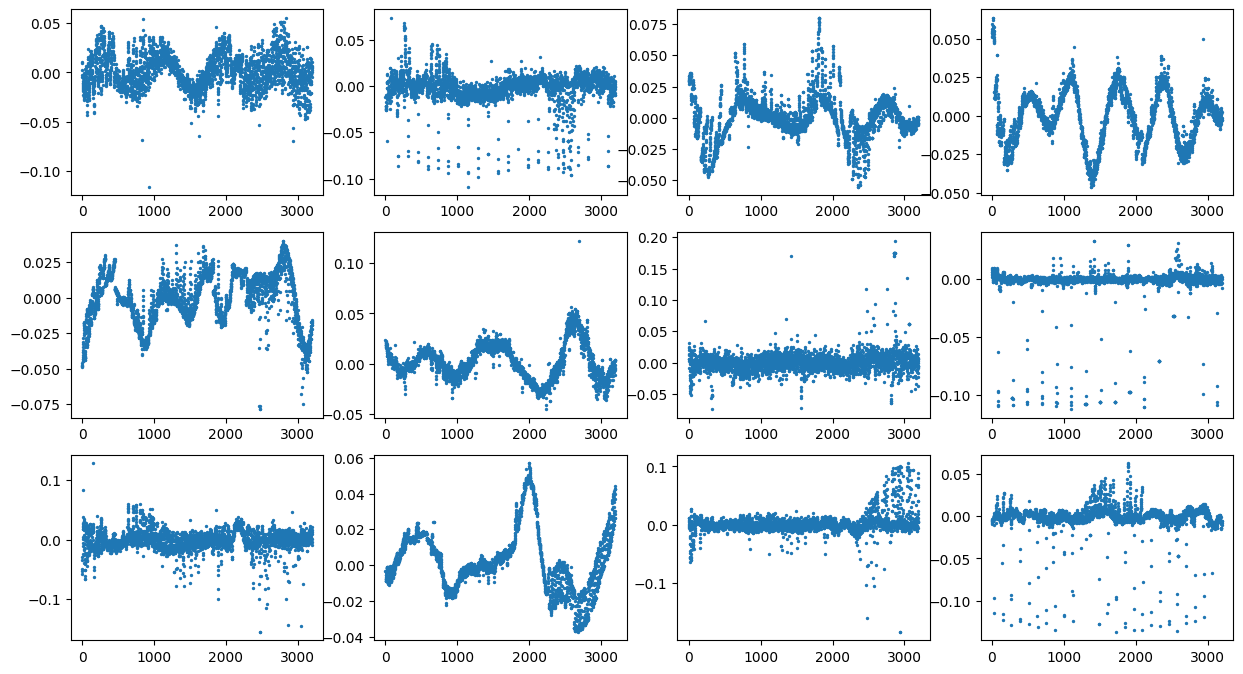

In [ ]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),normalized_x[i],s=2)

### SMOTE Algorithm



<div>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*RNGwoIWG2Aw40O4CmmSuKA.png" width="1000"/>
</div>



For each minority class sample, find its k nearest neighbors (other minority samples).

Randomly select one of these neighbors.

Create a new synthetic sample at a random point along the line segment connecting the original sample and the selected neighbor.



The formula for generating a synthetic sample is:
$$
x_{\text{new}} = x_i + \delta \cdot (x_{nn} - x_i)
$$
where $x_i$ is the original minority point, $x_{nn}$ is one of its neighbors, and $\delta$ is a random number between 0 and 1.

Repeat this process until the minority class is balanced with the majority class.

This approach makes the minority region denser and avoids simply duplicating existing points, which reduces overfitting and helps the model learn a better decision boundary.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy="minority", random_state=42)
X_smote, y_smote = smote.fit_resample(x_smooth, y)

In [ ]:
categories = ["Exoplanet", "No Exoplanet"]
values = [np.sum(y_smote == 1), np.sum(y_smote == 0)]
plt.bar(categories, values, color = 'skyblue')
plt.xlabel("Subjects")
plt.ylabel("Count")
plt.show()


# Rebuild Models

### Train_Test_Split and Convert to Tensors

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_smote, y_smote)

In [ ]:
x_train_tensor = torch.tensor(x_train, dtype = torch.float32)
x_test_tensor = torch.tensor(x_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float32)

In [ ]:
x_train_tensor.shape

torch.Size([8422, 3197])

In [ ]:
y_train_tensor = y_train_tensor.reshape(8422,1)

### Rebuild Neural Networks

In [ ]:
#Class inherits from nn.Module
#Constructor needs to call super
#I would advise a larger nn than a smaller one in both number of neurons and layer
#Since its a binary classification ideally you should use what activation function in the end?


### Optimiser and Loss

In [ ]:
#Use Adam Optimizer
#Define Loss and Optimizer
criterion = torch.nn.BCELoss()
optimiser = torch.optim.Adam(model.parameters(), lr = 0.1)

### Train

In [ ]:
#The number of epochs you do (i.e.) convergence conditions is up to you.
for epoch in range(1000):

    #predictions from x_train data
    preds = model(x_train_tensor)
    loss = criterion(preds, y_train_tensor)

    #Sets optimizer so it won't accumulate gradients
    optimiser.zero_grad()

    #Calculate gradient descent
    loss.backward()

    #Update weights
    optimiser.step()

    #Print loss:
    if epoch % 10 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

### Prediction and Evaluation

In [ ]:
y_prediction = model(x_test_tensor)

In [ ]:
y_pred_np = y_prediction.detach().cpu().numpy()
y_test_np = y_test_tensor.detach().cpu().numpy()

In [ ]:
y_pred_np = np.round(y_pred_np)

Accuracy: 0.9950142450142451
Recall: 1.0
Precision: 0.9903248099516241
F1: 0.9951388888888889


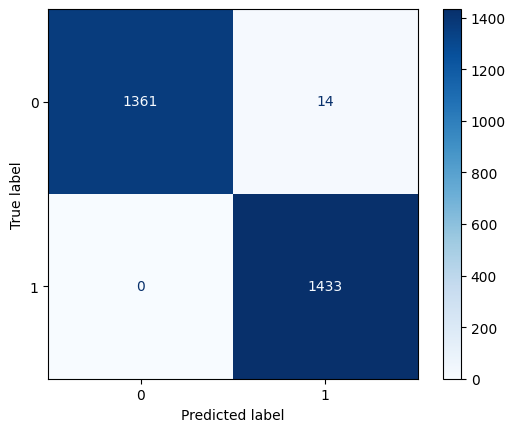

In [ ]:
#Do the same thing with the confusion matrix. Calculate accuracy, precisio, recall f1.

#Import accuracy_score precision score recall score f1 score and ConfusionMatrixDisplay from sklearn.metrics.

accuracy = accuracy_score(y_test_np, y_pred_np)
recall = recall_score(y_test_np, y_pred_np)
precision = precision_score(y_test_np, y_pred_np)
f1 = f1_score(y_test_np, y_pred_np)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")

matrix = confusion_matrix(y_test_np, y_pred_np)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.show()

## **Critical Thinking: Did we do OOD?**

I don't think so. To be truly OOD, we would pick another light curve dataset that the model wasn't trained on and test if the model can predict based on those light curves. This is fairly similar to our power law. But as a first applied project, this is a good start.  